In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
profiles_df = pd.read_csv("./data/profiles.csv")

profiles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81727 entries, 0 to 81726
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   profile          81727 non-null  object
 1   gender           53856 non-null  object
 2   birthday         46807 non-null  object
 3   favorites_anime  81727 non-null  object
 4   link             81727 non-null  object
dtypes: object(5)
memory usage: 3.1+ MB


In [3]:
profiles_df = profiles_df.drop_duplicates(subset=['profile'], keep='first')

In [4]:
missing_values = profiles_df.isnull().sum()

def standardize_birthday(date_str):
    if pd.isnull(date_str) or len(date_str.split()) != 3:
        return pd.NaT
    return pd.to_datetime(date_str, errors='coerce')

profiles_df['birthday'] = profiles_df['birthday'].apply(standardize_birthday)

profiles_df['favorites_anime'] = profiles_df['favorites_anime'].apply(lambda x: eval(x) if pd.notnull(x) else [])
profiles_df['favorites_anime_count'] = profiles_df['favorites_anime'].apply(len)

cleaning_summary = {
    "missing_values": missing_values,
    "birthday_column_type": profiles_df['birthday'].dtype
}

print(cleaning_summary)

{'missing_values': profile                0
gender             17007
birthday           21037
favorites_anime        0
link                   0
dtype: int64, 'birthday_column_type': dtype('<M8[ns]')}


In [5]:
profiles_df

,profile,gender,birthday,favorites_anime,link,favorites_anime_count
0,DesolatePsyche,Male,1994-10-02,"[33352, 25013, 5530, 33674, 1482, 269, 18245, ...",https://myanimelist.net/profile/DesolatePsyche,20
1,baekbeans,Female,2000-11-10,"[11061, 31964, 853, 20583, 918, 9253, 34599, 3...",https://myanimelist.net/profile/baekbeans,10
2,skrn,NaN,NaT,"[918, 2904, 11741, 17074, 23273, 32281, 9989, ...",https://myanimelist.net/profile/skrn,9
3,edgewalker00,Male,NaT,"[5680, 849, 2904, 3588, 37349]",https://myanimelist.net/profile/edgewalker00,5
4,aManOfCulture99,Male,1999-10-30,"[4181, 7791, 9617, 5680, 2167, 4382, 849, 235,...",https://myanimelist.net/profile/aManOfCulture99,10
...,...,...,...,...,...,...
77656,daniel1302,NaN,NaT,[],https://myanimelist.net/profile/daniel1302,0
77657,bridgesams,Male,2001-01-01,"[37510, 35180, 30, 31043, 5081, 37450, 11843]",https://myanimelist.net/profile/bridgesams,7
77659,Officer_Anime,NaN,NaT,[],https://myanimelist.net/profile/Officer_Anime,0
77660,Yuez,NaN,NaT,[],https://myanimelist.net/profile/Yuez,0


In [6]:
gender_distribution = profiles_df['gender'].value_counts(dropna=False)

birthday_distribution = profiles_df['birthday'].dt.month.value_counts().sort_index()

all_favorite_anime = [anime for sublist in profiles_df['favorites_anime'] for anime in sublist]
favorite_anime_counts = pd.Series(all_favorite_anime).value_counts()

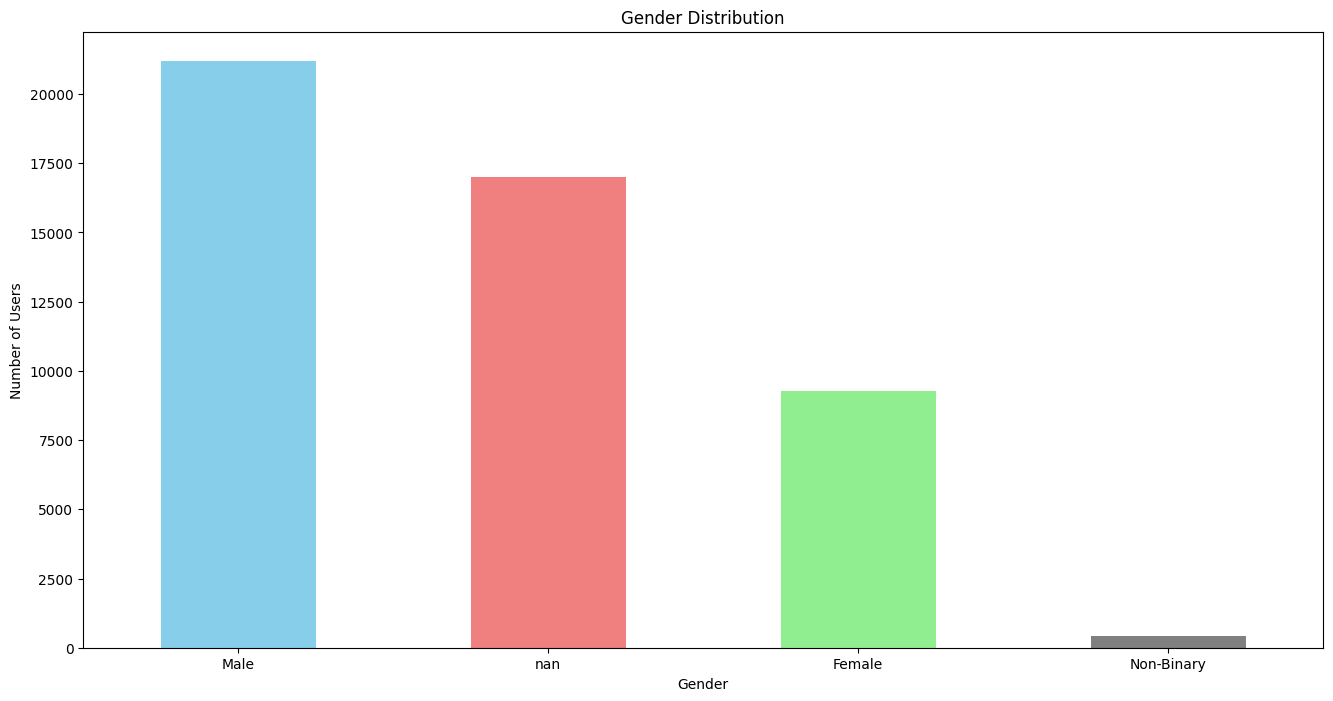

In [7]:
plt.figure(figsize=(16, 8))
gender_distribution.plot(kind='bar', color=['skyblue', 'lightcoral', 'lightgreen', 'grey'])
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Number of Users')
plt.xticks(rotation=0)
plt.show()

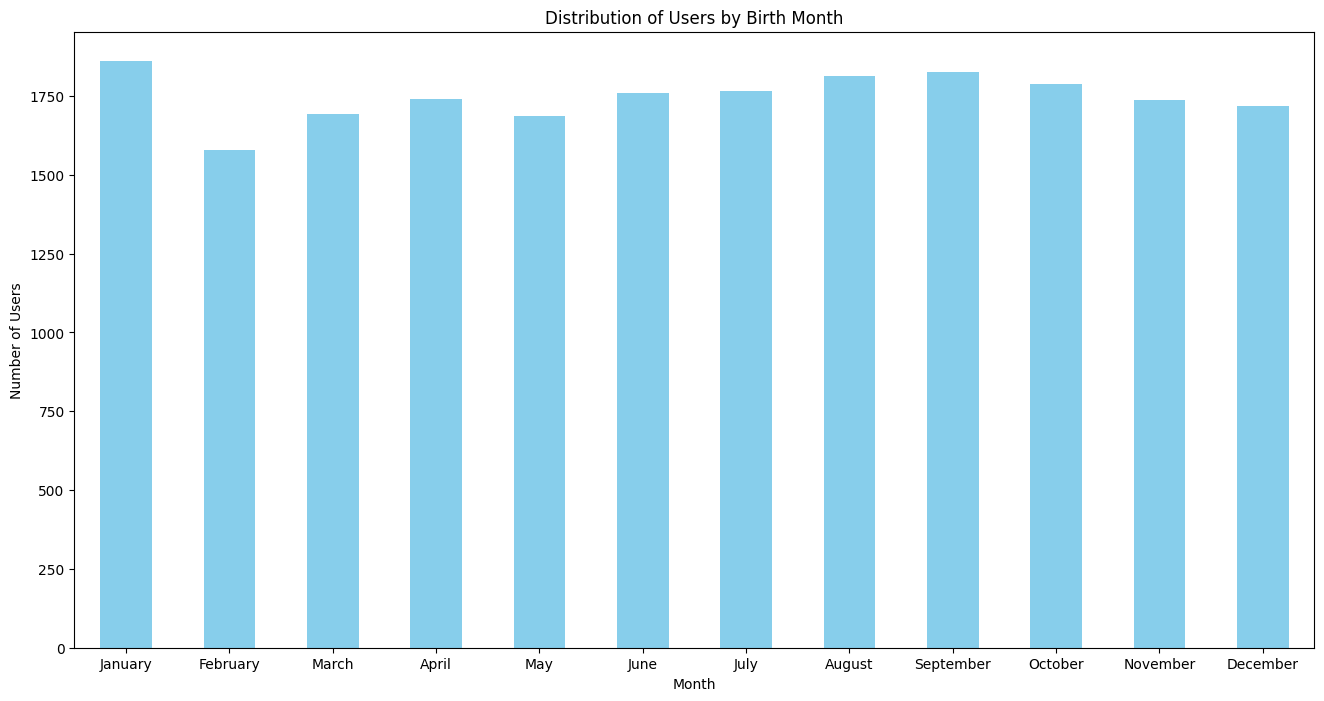

In [8]:
plt.figure(figsize=(16, 8))
birthday_distribution.plot(kind='bar', color='skyblue')
plt.title('Distribution of Users by Birth Month')
plt.xlabel('Month')
plt.ylabel('Number of Users')
plt.xticks(ticks=range(12), labels=[
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'], rotation=0)
plt.show()

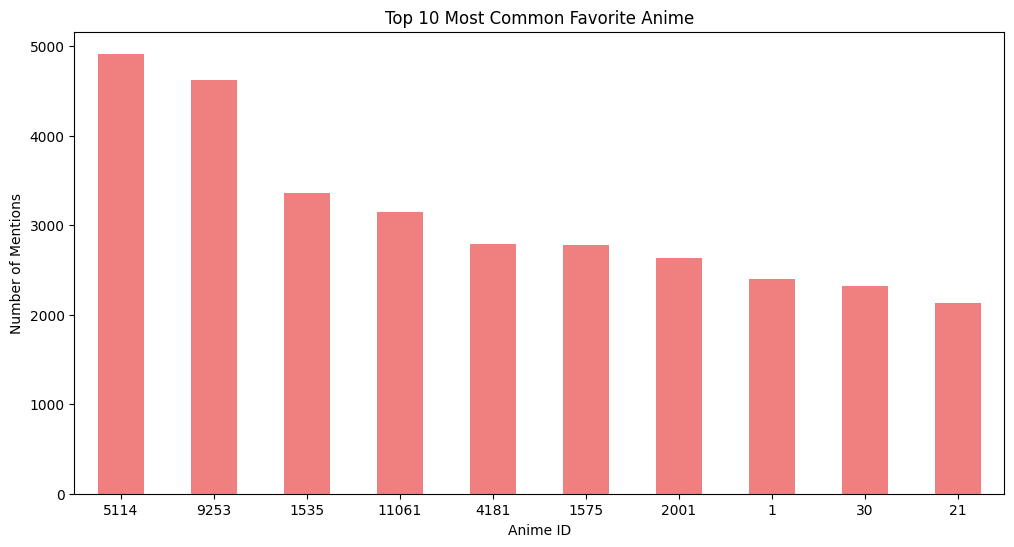

In [9]:
plt.figure(figsize=(12, 6))
favorite_anime_counts.head(10).plot(kind='bar', color='lightcoral')
plt.title('Top 10 Most Common Favorite Anime')
plt.xlabel('Anime ID')
plt.ylabel('Number of Mentions')
plt.xticks(rotation=0)
plt.show()